In [1]:
from ultralytics import YOLO
import os
import yaml

model = YOLO('/home/longvv/Contour-detection/modules/runs/train_ultralytics/yolov8s2/weights/best.pt')  # load a pretrained model

# Test the model on the test set
test_results = model.predict(
    source='/home/longvv/Contour-detection/yolo_dataset/test/images',
    save=True,
    save_txt=True,
    save_conf=True,
    project='runs/test',
    name='yolov8s_contour_test'
)

print(f"Test completed and results saved to 'runs/test/yolov8s_contour_test'")



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/4500 /home/longvv/Contour-detection/yolo_dataset/test/images/contour_000014.png: 640x640 1 2, 1 5, 16.3ms
image 2/4500 /home/longvv/Contour-detection/yolo_dataset/test/images/contour_000019.png: 640x640 1 4, 1 6, 16.3ms
image 3/4500 /home/longvv/Contour-detection/yolo_dataset/test/images/contour_000023.png: 640x640 1 2, 1 5, 16.3ms
image 4/4500 /home/longvv/Contour-detection/yolo_dataset/test/images/contour_000036.png: 640x640 1 6, 16.2ms
image

In [2]:
from ultralytics import YOLO
import os
import yaml

model = YOLO('/home/longvv/Contour-detection/modules/runs/train_ultralytics/yolov8n/weights/best.pt')  # load a pretrained model

# Test the model on the test set
test_results = model.predict(
    source='/home/longvv/Contour-detection/yolo_dataset/test/images',
    save=True,
    save_txt=True,
    save_conf=True,
    project='runs/test',
    name='yolov8n_contour_test'
)

print(f"Test completed and results saved to 'runs/test/yolov8n_contour_test'")



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/4500 /home/longvv/Contour-detection/yolo_dataset/test/images/contour_000014.png: 640x640 1 2, 1 5, 4.7ms
image 2/4500 /home/longvv/Contour-detection/yolo_dataset/test/images/contour_000019.png: 640x640 1 4, 1 6, 4.8ms
image 3/4500 /home/longvv/Contour-detection/yolo_dataset/test/images/contour_000023.png: 640x640 1 2, 1 5, 4.6ms
image 4/4500 /home/longvv/Contour-detection/yolo_dataset/test/images/contour_000036.png: 640x640 1 6, 4.7ms
image 5/4

In [1]:
from utils import *
from dataset import *
from model import *
from loss import *
import tqdm
import wandb
import random
random_number = random.randint(3, 3000)

model = YOLO(S=S, BOX=BOX, CLS=CLS)

def get_dataloader(data_path):
    data = read_data(data_path)
    dataset = ContourDataset(data, transforms=train_transforms)
    return DataLoader(
        dataset,
        batch_size=64,
        shuffle=True,
        num_workers=4,
        collate_fn=collate_fn, drop_last=False)

test_path = DATA_DIR + '/test'
test_loader = get_dataloader(test_path)

total_loss = 0
area_loss = 0
obj_loss = 0
mse_loss = 0
iters = 1
model.eval()

device = 'cuda'
model.load_state_dict(torch.load('/home/longvv/Contour-detection/model/best_scratch_mse.pth'))
model.to(device)
'''
model.eval()
with torch.no_grad():
    for imgs, targets in test_loader:
        tensor_imgs, tensor_targets = torch.stack(imgs), torch.stack(targets)
        output = model(tensor_imgs.to(device))
        loss, aux = custom_loss(output_tensor=output, target_tensor=tensor_targets.to(device))
        total_loss += loss.item()
        area_loss += aux[0].item()
        obj_loss += aux[1].item()
        mse_loss += aux[2].item()

        iters += 1
        if iters%random_number == 0:
            boxes = output_tensor_to_boxes(output[0].detach().cpu())
            boxes = nonmax_suppression(boxes)
            img = imgs[0].permute(1,2,0).cpu().numpy()
            img = visualize_bbox(img.copy(), boxes=boxes)
            plot_img(img, size=(4,4))

total_loss /= len(test_loader)
area_loss /= len(test_loader)    
obj_loss /= len(test_loader)
mse_loss /= len(test_loader)
print(f"Test Loss: {total_loss}, Area_loss: {area_loss}, Obj_loss: {obj_loss}, MSE: {mse_loss}")
print()'
'''

'\nmodel.eval()\nwith torch.no_grad():\n    for imgs, targets in test_loader:\n        tensor_imgs, tensor_targets = torch.stack(imgs), torch.stack(targets)\n        output = model(tensor_imgs.to(device))\n        loss, aux = custom_loss(output_tensor=output, target_tensor=tensor_targets.to(device))\n        total_loss += loss.item()\n        area_loss += aux[0].item()\n        obj_loss += aux[1].item()\n        mse_loss += aux[2].item()\n\n        iters += 1\n        if iters%random_number == 0:\n            boxes = output_tensor_to_boxes(output[0].detach().cpu())\n            boxes = nonmax_suppression(boxes)\n            img = imgs[0].permute(1,2,0).cpu().numpy()\n            img = visualize_bbox(img.copy(), boxes=boxes)\n            plot_img(img, size=(4,4))\n\ntotal_loss /= len(test_loader)\narea_loss /= len(test_loader)    \nobj_loss /= len(test_loader)\nmse_loss /= len(test_loader)\nprint(f"Test Loss: {total_loss}, Area_loss: {area_loss}, Obj_loss: {obj_loss}, MSE: {mse_loss}")\

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[tensor(28.7182), tensor(148.3444), tensor(301.0410), tensor(272.2814), tensor([0.8310]), tensor(4.)]]


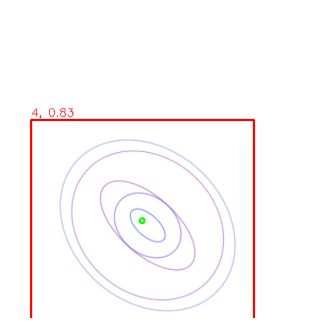

In [12]:
def get_dataset(data_path):
    data = read_data(data_path)
    dataset = ContourDataset(data, transforms=train_transforms)
    return dataset

test_loader = get_dataloader(test_path)
imgs, targets = next(iter(test_loader))

model.eval()
with torch.no_grad():
    tensor_imgs = torch.stack(imgs)
    output = model(tensor_imgs.to(device))

    boxes = output_tensor_to_boxes(output[0].detach().cpu())
    boxes = nonmax_suppression(boxes)

    print(boxes)

    img = imgs[0].permute(1,2,0).cpu().numpy()
    img = visualize_bbox(img.copy(), boxes=boxes)

    size=(4,4)
    plt.figure(figsize=size)
    plt.imshow(img[:,:,::-1])
    plt.axis('off')
    plt.savefig('output_image.png')
    plt.show()

